## 0. Installation

Install the SDV community

In [1]:
%pip install sdv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 1. Loading the libraries

In [3]:
from sdv.datasets.demo import download_demo
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality, get_column_plot, get_column_pair_plot
import time

## 2. Loading the data

In [4]:
real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='census_extended'
)
len(real_data)
real_data.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,dob,address,pob
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1980-11-07,"058 Wilson Inlet Apt. 470\nLake Miguel, FL 06513","Washington, D.C."
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1969-08-20,"9915 Andrew Road\nEricashire, NC 38090","Washington, D.C."
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1982-06-03,"4656 Tammy Terrace\nEast Tonyahaven, NE 13680","Washington, D.C."
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1967-06-23,"503 Danielle Dam\nSouth Melissashire, AR 33167","Washington, D.C."
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1992-06-16,"584 Anderson Forks Suite 203\nGilesside, NM 78530",Habana


Overview of the metadata for the selected dataset

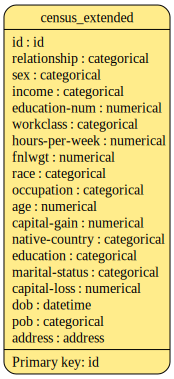

In [6]:
metadata.visualize()

## 3. Creating the synthesizer

Create the synthesizer using the CTGAN algorithm':

In [7]:
synthesizer = CTGANSynthesizer(metadata)

Train the synthesizer using the real data (`real_data`):

In [8]:
start_time = time.time()
synthesizer.fit(
    data=real_data
)
end_time = time.time()
execution_time = end_time - start_time
minutes = int(execution_time // 60)
seconds = execution_time % 60

print(f"Training time: {minutes} minutes and {seconds:.2f} seconds")

/home/fabinatix/.local/lib/python3.13/site-packages/sdv/metadata/multi_table.py:880: UserWarning: No 'datetime_format' is present in the metadata for the following columns:
      Table Name Column Name   sdtype datetime_format
census_extended         dob datetime            None
Without this specification, SDV may not be able to accurately parse the data. We recommend adding datetime formats using 'update_column'.
  warnings.warn(warning_msg)


Training time: 17 minutes and 18.18 seconds


Computed loss values for each epoch for both the generator and discriminator:

In [9]:
synthesizer.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,2.055074,-0.400126
1,1,0.736408,0.290183
2,2,0.410203,0.206665
3,3,0.021038,0.248245
4,4,-0.166606,-0.206853
...,...,...,...
295,295,-0.701132,0.099130
296,296,-0.902452,-0.311760
297,297,-0.753042,-0.165902
298,298,-0.870611,-0.327954


Optional visualization of the loss values:

In [1]:

fig = synthesizer.get_loss_values_plot()
fig.show()

NameError: name 'synthesizer' is not defined

## 4. Generate synthetic data

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=5000
)

Compare real data with synthetic data:

In [ ]:
real_data[5:10]
synthetic_data.head()

## 5. Evaluation of real vs. synthetic data

### 5.1 Diagnostic

In [ ]:
diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

### 5.2 Data quality

In [ ]:
quality_report = evaluate_quality(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Overview of detailed values:

In [ ]:
quality_report.get_details('Column Shapes')

### 5.3 Anonymization

The original dataset included some sensitive columns such as residential address or place of birth. In the synthetic data, these columns are fully anonymized – they contain entirely fake values that match the format of the original data.

In [ ]:
sensitive_column_names = ['dob', 'pob', 'address']
real_data[sensitive_column_names].head()
synthetic_data[sensitive_column_names].head()

### 5.4 Visualization of the data

Age distribution in real and synthetic data:

In [ ]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='age',
    metadata=metadata
)
fig.show()

Distribution of years of education in real and synthetic data:

In [ ]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='education-num',
    metadata=metadata
)
fig.show()

Distribution of marital status in real and synthetic data:

In [ ]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='marital-status',
    metadata=metadata
)
fig.show()

Correlation between type of employment and years of education:

In [ ]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['education-num', 'occupation'],
    metadata=metadata
)
fig.show()

Correlation between ethnicity and years of education:

In [ ]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['education-num', 'race'],
    metadata=metadata
)
fig.show()

Correlation between income and years of education:

In [ ]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['education-num', 'income'],
    metadata=metadata
)
fig.show()